<a href="https://colab.research.google.com/github/noorehira/ProgrammingForAI/blob/main/Lab_9KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traditional Machine Learning Implementation**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load the dataset
titanic_data = pd.read_csv('titanic.csv')

#print(titanic_data.isnull().sum())
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

#sex = pd.get_dummies(train['Sex'],dtype=int)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], dtype=int)

# Select features and target variable
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_data[['Survived']]


# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = knn.predict(X_test)
#print("Predicted Values:")
#print(y_pred )

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Step 8: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Model Accuracy: 0.7095
Confusion Matrix:
[[87 18]
 [34 40]]


<ipython-input-5-32518d6251b9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
<ipython-input-5-32518d6251b9>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

# **Sklearn Pipeline Implementation**

In [6]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('titanic.csv')

#print("Original DataFrame:")
#print(data)
#print(data.shape)


def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    return X

# Custom function to create the FamilySize feature
def create_family_size(X):
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1  # Adding 1 for the individual themselves
    return X

# Custom function to drop specified columns
def drop_columns(X):
    return X.drop(['SibSp', 'Parch'], axis=1)

# Function to create FamilySize and drop SibSp and Parch columns
def family_size(X):
    X = create_family_size(X)
    X = drop_columns(X)
    return X

# Create pipelines for Age
age_pipeline = Pipeline(steps=[
    ('age_imputer', SimpleImputer(strategy='mean')),  # Impute Age
    ('age_scaler', MinMaxScaler())  # Scale Age
])

fare_pipeline = Pipeline(steps=[
    #('fare_imputer', SimpleImputer(strategy='mean')),  # Impute Fare
    ('fare_scaler', MinMaxScaler())  # Scale Fare
])

family_size_pipeline = Pipeline(steps=[
    ('family_size_creator', FunctionTransformer(family_size)),
    ('family_size_scaler', MinMaxScaler()),  # Scale Family_Size
])

embarked_pipeline = Pipeline(steps=[
    ('embarked_imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked
    ('embarked_onehot', OneHotEncoder())  # One-hot encode Embarked
])

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('age_encoder', age_pipeline, ['Age']),
    ('fare_encoder', fare_pipeline, ['Fare']),
    ('family_size', family_size_pipeline, ['SibSp', 'Parch']),  # Process FamilySize
    ('embarked_encoder', embarked_pipeline, ['Embarked']),
    ('sex_encoder', OneHotEncoder(), ['Sex']),
    ('scaler', MinMaxScaler(), ['Pclass']),  # Scale Pclass
], remainder='passthrough')

# Create a complete pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # KNN Classifier
])

X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Step 8: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model Accuracy: 0.80
Confusion Matrix:
[[90 15]
 [21 53]]



Mean Accuracy on Training Set (10-fold CV): 0.79


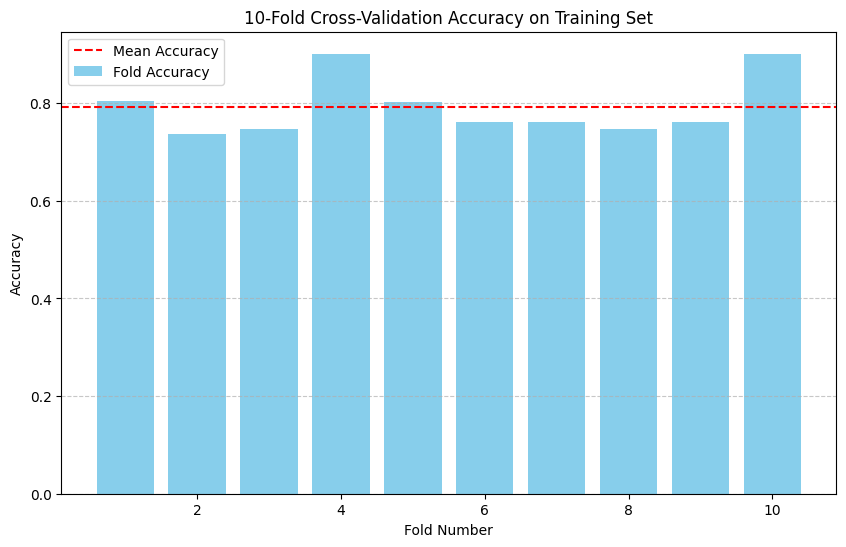

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform 10-fold cross-validation on the training set
k = 10
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='accuracy')

# Calculate mean accuracy on the training set cross-validation
mean_cv_accuracy = cv_scores.mean()
print(f"\nMean Accuracy on Training Set (10-fold CV): {mean_cv_accuracy:.2f}")

# Plot the accuracy for each fold as a bar graph
folds = range(1, k + 1)  # Fold numbers
plt.figure(figsize=(10, 6))
plt.bar(folds, cv_scores, color='skyblue', label='Fold Accuracy')

# Add a line for the mean accuracy
plt.axhline(y=mean_cv_accuracy, color='red', linestyle='--', label='Mean Accuracy')

# Add labels and title
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Accuracy on Training Set')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Mean Accuracy on Training Set (10-fold CV): 0.79


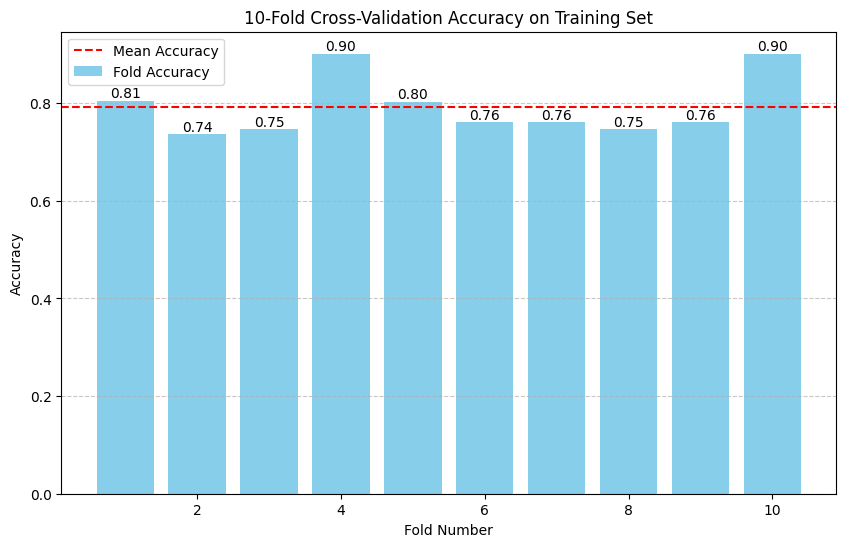

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform 10-fold cross-validation on the training set
k = 10
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='accuracy')

# Calculate mean accuracy on the training set cross-validation
mean_cv_accuracy = cv_scores.mean()
print(f"\nMean Accuracy on Training Set (10-fold CV): {mean_cv_accuracy:.2f}")

# Plot the accuracy for each fold as a bar graph
folds = range(1, k + 1)  # Fold numbers
plt.figure(figsize=(10, 6))
bars = plt.bar(folds, cv_scores, color='skyblue', label='Fold Accuracy')

# Add a line for the mean accuracy
plt.axhline(y=mean_cv_accuracy, color='red', linestyle='--', label='Mean Accuracy')

# Add labels on top of each bar to show exact accuracy
for bar, score in zip(bars, cv_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}",
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Accuracy on Training Set')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Lab Task

Perform the steps mentioned above on the following dataset

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease